## Read/check HRES_POST Data

This script validates postprocessing for HRES data, including checking original data, preprocessing steps, and ensuring data integrity.

In [1]:
# import libraries and directories
from py_env_hpc import *

### 1. Check the postprocessed HRES data in `HRES_DUMP3`

- Check the values, time, and number of steps (e.g. 91)


In [27]:
file=sorted(os.listdir(HRES_DUMP2))[0]
print(file)
data = xr.open_dataset(HRES_DUMP2+"/"+file)
data
#data["tp"][:, 100, 100].values
data["pr"][:, 100, 100].time
#data["tp"][:, 100, 100].values.shape

#print("OK")

ADAPTER_DE05.day01.merged.20180101.nc


<xarray.DataArray 'time' (time: 11)>
array(['2018-01-01T13:00:00.000000000', '2018-01-01T14:00:00.000000000',
       '2018-01-01T15:00:00.000000000', '2018-01-01T16:00:00.000000000',
       '2018-01-01T17:00:00.000000000', '2018-01-01T18:00:00.000000000',
       '2018-01-01T19:00:00.000000000', '2018-01-01T20:00:00.000000000',
       '2018-01-01T21:00:00.000000000', '2018-01-01T22:00:00.000000000',
       '2018-01-01T23:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time       (time) datetime64[ns] 2018-01-01T13:00:00 ... 2018-01-01T23:00:00
    longitude  float32 8.9
    latitude   float32 46.5
Attributes:
    standard_name:  time
    long_name:      time
    axis:           T

### 2. Check the postprocessed HRES data in `HRES_POST`

- Check the values, time, and number of steps (e.g. 91)
- Compare with files in `HRES_OR`.


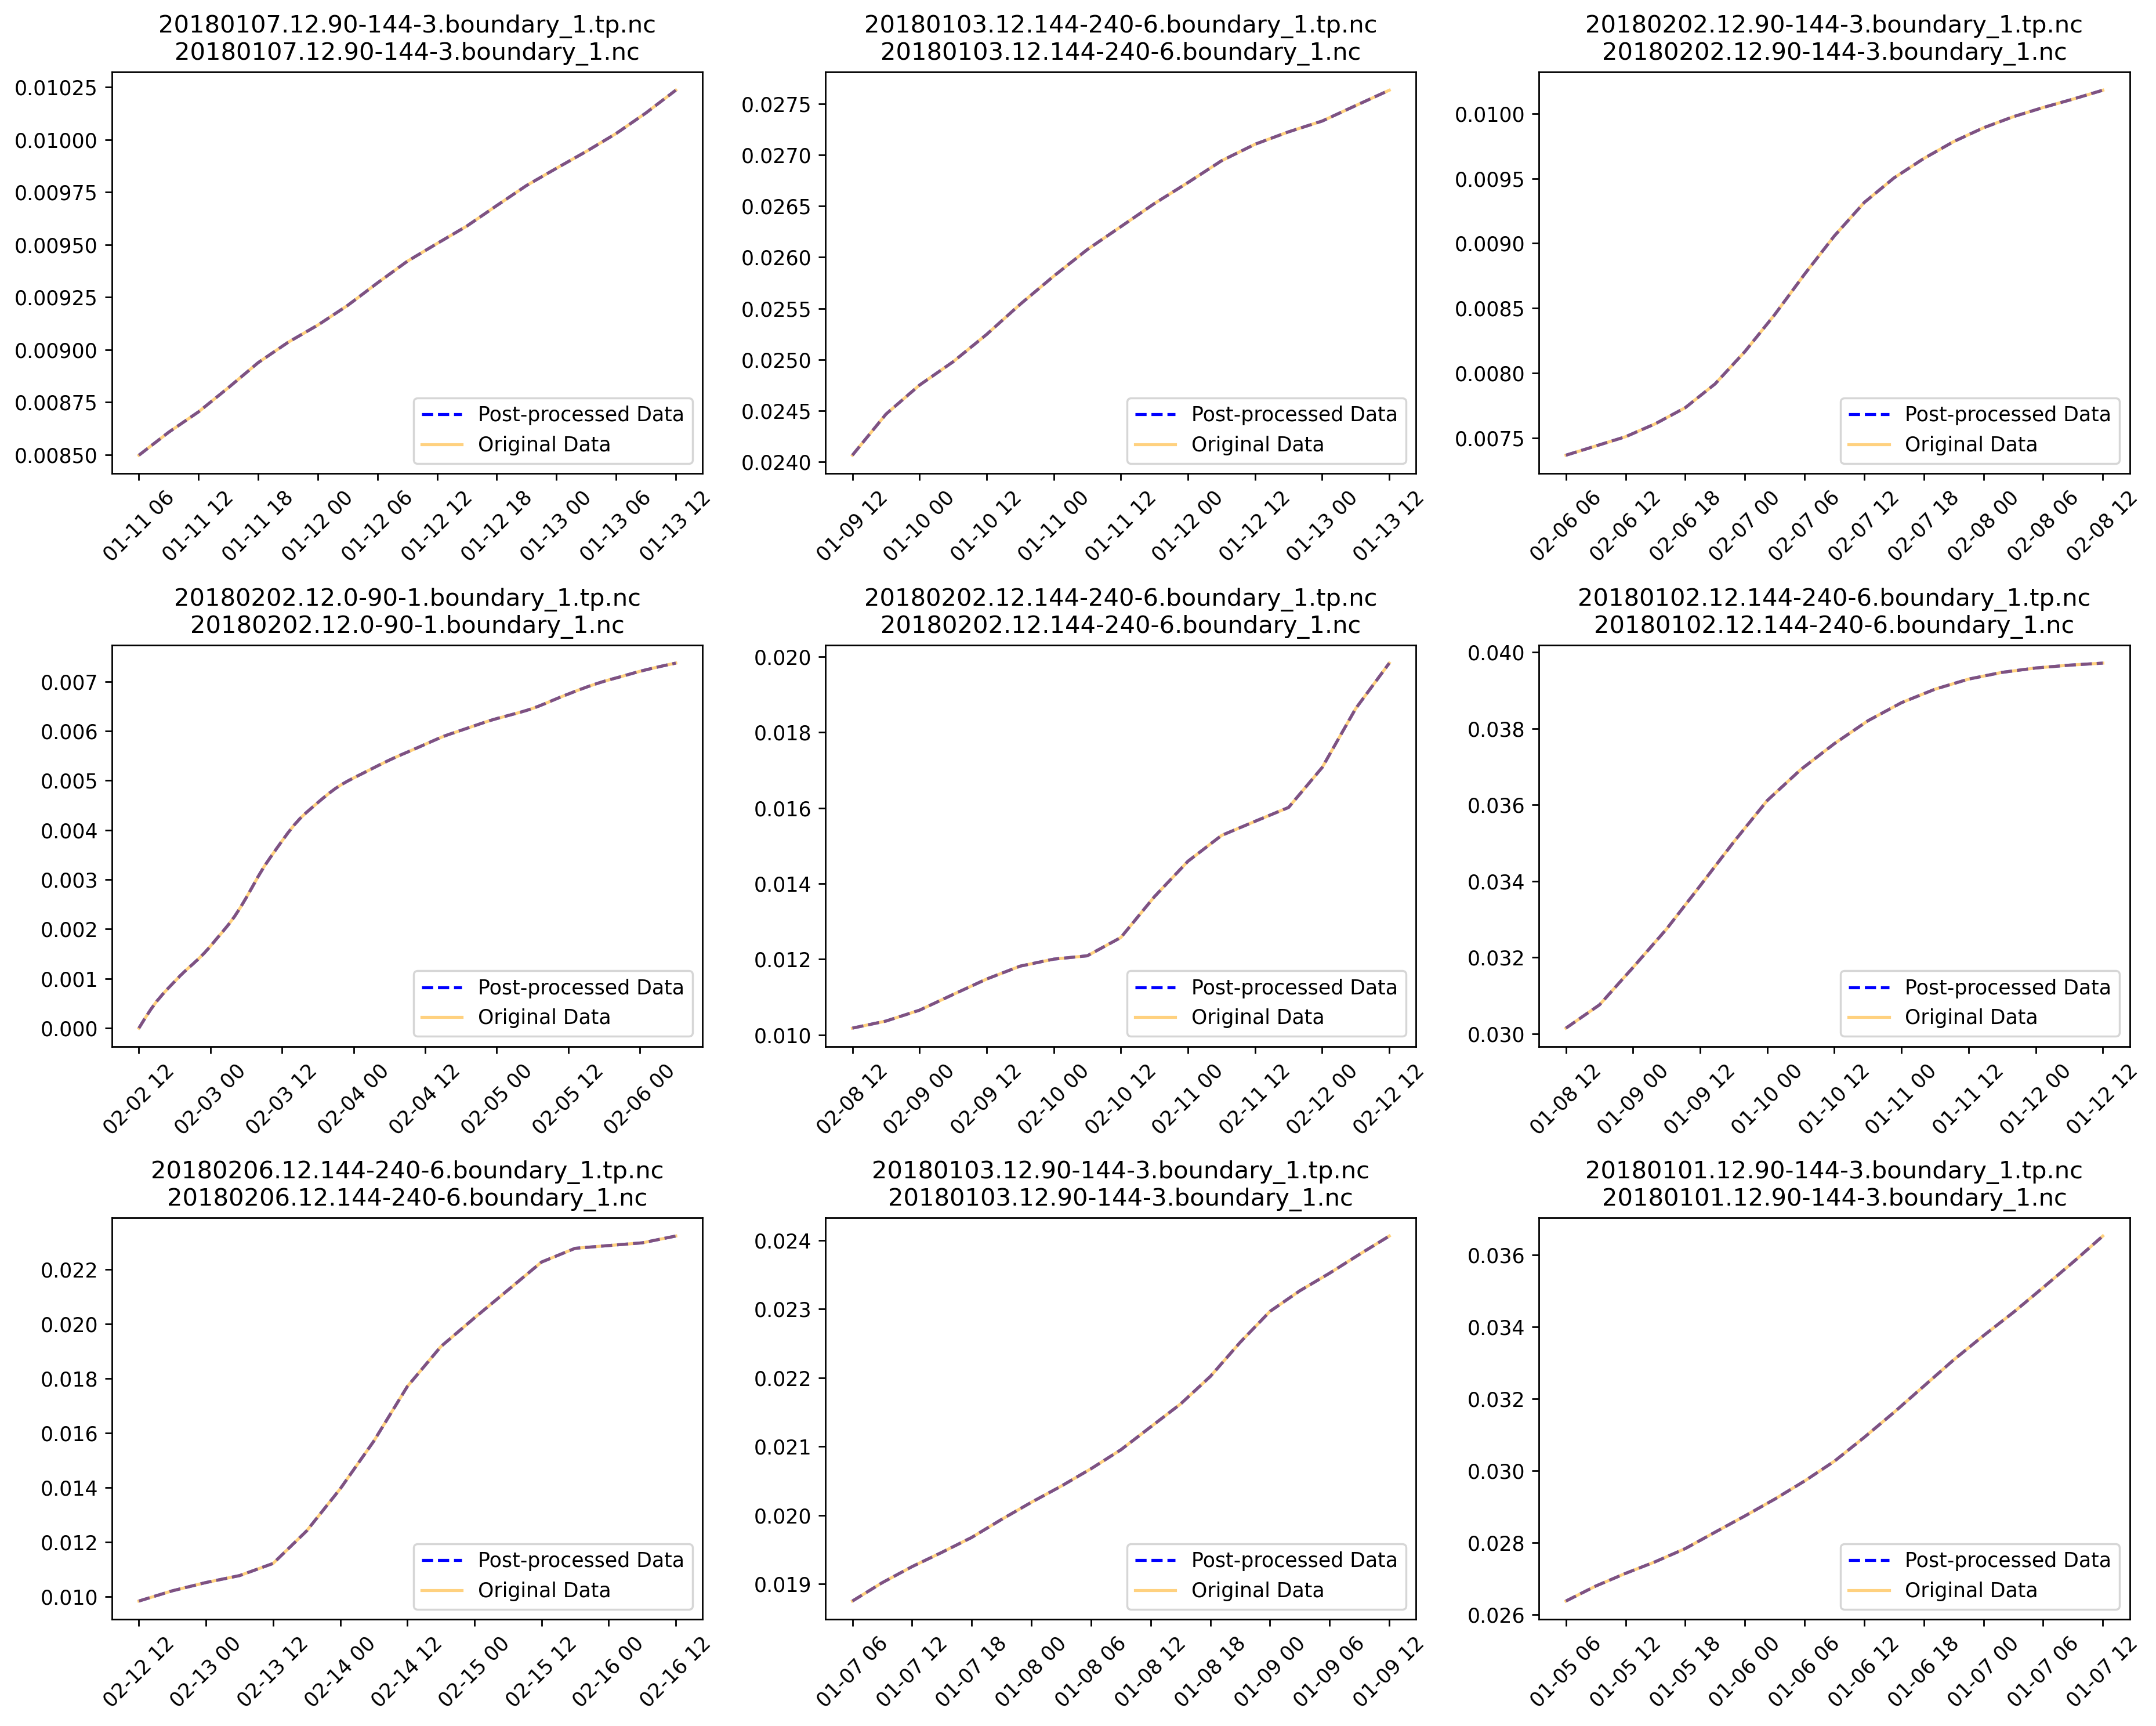

In [29]:
import random
import os
import xarray as xr
import matplotlib.pyplot as plt

# List files
files_post = sorted(os.listdir(HRES_POST))
files_or = sorted(os.listdir(HRES_OR))

# Take 25 random files from HRES_POST
random_files_post = random.sample(files_post, 9)

# Find equivalent files in HRES_OR
random_files_or = [file.replace('.tp.nc', '.nc') for file in random_files_post]

# Initialize plot
fig, axs = plt.subplots(3, 3, figsize=(15,12), dpi=250)

# Loop through random files and plot
for i, (file_post, file_or) in enumerate(zip(random_files_post, random_files_or)):
    # Read data
    data_post = xr.open_dataset(os.path.join(HRES_POST, file_post))
    data_or = xr.open_dataset(os.path.join(HRES_OR, file_or))
    
    # Calculate areal average over time
    areal_avg_data_post = data_post["tp"].mean(dim=['longitude', 'latitude'])
    areal_avg_data_or = data_or["tp"].mean(dim=['longitude', 'latitude'])
    
    # Plot
    ax = axs[i // 3, i % 3]
    ax.plot(areal_avg_data_post['time'], areal_avg_data_post, label='Post-processed Data', color='blue', ls='--', alpha=1)
    ax.plot(areal_avg_data_or['time'], areal_avg_data_or, label='Original Data', color='orange', alpha=0.5)
    ax.set_title(f"{file_post[13:]}\n{file_or[13:]}")
    ax.legend(loc="lower right")
    ax.tick_params(axis='x', rotation=45)

# Show plot
plt.tight_layout()
plt.show()


In [25]:
files_post

['ADAPTER_DE05_20180101.12.0-90-1.boundary_1.tp.nc',
 'ADAPTER_DE05_20180101.12.144-240-6.boundary_1.tp.nc',
 'ADAPTER_DE05_20180101.12.90-144-3.boundary_1.tp.nc',
 'ADAPTER_DE05_20180102.12.0-90-1.boundary_1.tp.nc',
 'ADAPTER_DE05_20180102.12.144-240-6.boundary_1.tp.nc',
 'ADAPTER_DE05_20180102.12.90-144-3.boundary_1.tp.nc',
 'ADAPTER_DE05_20180103.12.0-90-1.boundary_1.tp.nc',
 'ADAPTER_DE05_20180103.12.144-240-6.boundary_1.tp.nc',
 'ADAPTER_DE05_20180103.12.90-144-3.boundary_1.tp.nc',
 'ADAPTER_DE05_20180104.12.0-90-1.boundary_1.tp.nc',
 'ADAPTER_DE05_20180104.12.144-240-6.boundary_1.tp.nc',
 'ADAPTER_DE05_20180104.12.90-144-3.boundary_1.tp.nc',
 'ADAPTER_DE05_20180105.12.0-90-1.boundary_1.tp.nc',
 'ADAPTER_DE05_20180105.12.90-144-3.boundary_1.tp.nc',
 'ADAPTER_DE05_20180201.12.0-90-1.boundary_1.tp.nc',
 'ADAPTER_DE05_20180201.12.144-240-6.boundary_1.tp.nc',
 'ADAPTER_DE05_20180201.12.90-144-3.boundary_1.tp.nc',
 'ADAPTER_DE05_20180202.12.0-90-1.boundary_1.tp.nc',
 'ADAPTER_DE05_2018

In [5]:
data_post = xr.open_dataset(os.path.join(HRES_POST, files_post[0]))
data_post

<xarray.Dataset>
Dimensions:    (time: 91, longitude: 196, latitude: 125)
Coordinates:
  * time       (time) datetime64[ns] 2018-01-01T12:00:00 ... 2018-01-05T06:00:00
  * longitude  (longitude) float32 -1.1 -1.0 -0.9 -0.8 ... 18.1 18.2 18.3 18.4
  * latitude   (latitude) float32 56.5 56.4 56.3 56.2 ... 44.4 44.3 44.2 44.1
Data variables:
    tp         (time, latitude, longitude) float64 ...
Attributes:
    CDI:          Climate Data Interface version 2.0.2 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      post-processed to ECMWF format (reverted from instantaneous...
    CDO:          Climate Data Operators version 2.0.2 (https://mpimet.mpg.de...

In [6]:
data_post = xr.open_dataset(os.path.join(HRES_POST, files_post[2]))
data_post

<xarray.Dataset>
Dimensions:    (time: 91, longitude: 196, latitude: 125)
Coordinates:
  * time       (time) datetime64[ns] 2018-01-03T12:00:00 ... 2018-01-07T06:00:00
  * longitude  (longitude) float32 -1.1 -1.0 -0.9 -0.8 ... 18.1 18.2 18.3 18.4
  * latitude   (latitude) float32 56.5 56.4 56.3 56.2 ... 44.4 44.3 44.2 44.1
Data variables:
    tp         (time, latitude, longitude) float64 ...
Attributes:
    CDI:          Climate Data Interface version 2.0.2 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      post-processed to ECMWF format (reverted from instantaneous...
    CDO:          Climate Data Operators version 2.0.2 (https://mpimet.mpg.de...

In [7]:
data_or

<xarray.Dataset>
Dimensions:    (longitude: 196, latitude: 125, time: 91)
Coordinates:
  * longitude  (longitude) float32 -1.1 -1.0 -0.9 -0.8 ... 18.1 18.2 18.3 18.4
  * latitude   (latitude) float32 56.5 56.4 56.3 56.2 ... 44.4 44.3 44.2 44.1
  * time       (time) datetime64[ns] 2018-02-26T12:00:00 ... 2018-03-02T06:00:00
Data variables:
    ssrd       (time, latitude, longitude) float32 ...
    strd       (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 0.0 0.0 ... 0.004652 0.005316
    t2m        (time, latitude, longitude) float32 ...
    d2m        (time, latitude, longitude) float32 ...
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    sp         (time, latitude, longitude) float32 ...
    q          (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-01-22 11:15:28 GMT by grib_to_netcdf-2.19.1: grib_to_n...